In [17]:
import numpy as np

x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])

ey = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

ex=np.array([ 0.4,  0.1,  0.4,  0.4,  0.2,  0.2,  0.2,  0.1,  0.3,  0.2,  0.2,
        0.2,  0.1,  0.1,  0.4,  0.4,  0.4,  0.3,  0. ,  0.5])+1

In [16]:
print(np.around(ey),'\n')#
print(np.rint(ey),'\n')#四舍五入


print(np.floor(ey),'\n')#取整

print(np.ceil(ey),'\n')#向上取整


[ 4.  4.  3.  3.  4.  4.  2.  2.  2.  4.  2.  3.  4.  3.  3.  3.  3.  4.
  2.  4.] 

[ 4.  4.  3.  3.  4.  4.  2.  2.  2.  4.  2.  3.  4.  3.  3.  3.  3.  4.
  2.  4.] 

[ 3.  3.  2.  3.  3.  3.  2.  2.  2.  3.  2.  2.  3.  3.  3.  2.  3.  3.
  2.  3.] 

[ 4.  4.  3.  4.  4.  4.  3.  3.  3.  4.  3.  3.  4.  4.  4.  3.  4.  4.
  2.  4.] 



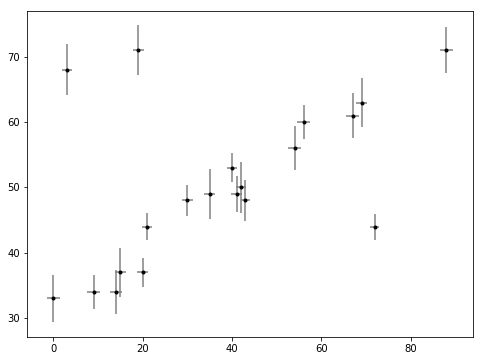

In [18]:
import numpy as np
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(8,6)
plt.errorbar(x, y,xerr=ex,yerr=ey, fmt='.k', ecolor='gray');

In [75]:
size=ex.size
Sigma=np.zeros((size,2,2))
for i in np.arange(size):
    Sigma[i]=np.array([[ex[i]**2,0],[0,ey[i]**2]])
    #print(Sigma[i])
    
#def log_prior(theta):

theta1=np.array([ 39.69978468,   0.23621066])    
    
def log_likelihood(theta,x,y,ex,ey):
    a=theta[1]#y=ax+b
    b=theta[0]
    sigma_p=theta[2]
    dy=y - theta[0] - theta[1] * x
    mu=np.array([-a/np.sqrt(1+a**2),a/np.sqrt(1+a**2)])
    Sigma_pen=np.sqrt((ey**2+a**2*ex**2)/(1+a**2))
    lnL=-3/2*np.log(1+a**2)-np.sum(np.log(Sigma_pen**2+sigma_p**2))/2-np.sum(dy**2/(Sigma_pen**2+sigma_p**2))
    return lnL

# Note that this step will take a few minutes to run!

ndim = 2 + 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(1, 1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[x, y, ex,ey])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

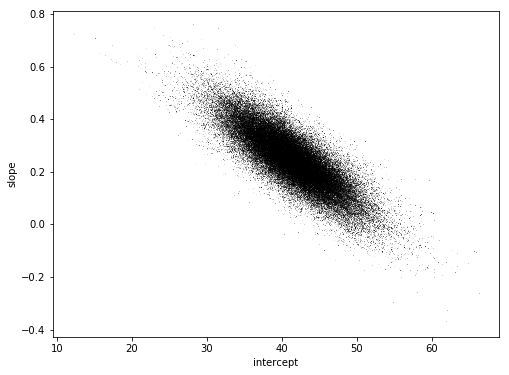

In [76]:
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope');

In [69]:
theta3 = np.mean(sample[:, :3], 0)

In [70]:
print(theta3)

[ 41.34010166   0.24578795   6.06558307]


In [71]:
print(theta1)

[ 39.69978468   0.23621066]


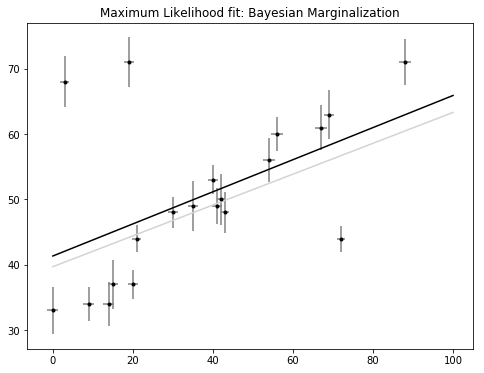

In [72]:
plt.errorbar(x, y, xerr=ex,yerr=ey, fmt='.k', ecolor='gray')
xfit = np.linspace(0, 100)
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
#plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='lightgray')
plt.plot(xfit, theta3[0] + theta3[1] * xfit, color='black')
#plt.plot(x[outliers], y[outliers], 'ro', ms=20, mfc='none', mec='red')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');

In [57]:
np.log10(100)

2.0

In [45]:
mu

array([-0.70710678,  0.70710678])

In [48]:
Sigma_pen

array([ 2.73130006,  2.86530976,  2.0880613 ,  2.6       ,  2.81780056,
        2.81780056,  1.77200451,  1.67630546,  1.86815417,  2.81780056,
        1.77200451,  2.15406592,  2.86530976,  2.32594067,  2.6       ,
        2.0880613 ,  2.6       ,  2.77308492,  1.58113883,  2.6925824 ])

In [47]:
Sigma_pen.size

20

In [33]:
Sigma.shape

(20, 2, 2)

In [36]:
sigma=np.array([[ex[0]**2,0],[0,ey[0]**2]])

In [41]:
sigma[1,1]

12.960000000000001

In [74]:
x.shape

(20,)